In [ ]:
# Problem 1
import numpy as np

# Parameters
beta_0 = 10.0
beta_1 = 0.5
sigma = 1.0
X_fixed = 2
mean_Y_given_X = beta_0 + beta_1 * X_fixed

# Number of simulations
num_simulations = 1000000

# Simulate Y given X = 2
Y_simulated = np.random.normal(loc=mean_Y_given_X, scale=sigma, size=num_simulations)

# Calculate the probability P(Y > 10 | X = 2)
prob_Y_greater_than_10 = np.mean(Y_simulated > 10)

print(f"Probability that Y > 10 given X = 2: {prob_Y_greater_than_10}")

In [ ]:
#Problem 2 Summary Statistics
import pandas as pd

# Load the scatterplots dataset
salary = pd.read_csv('Salary_dataset.csv')

# Display summary statistics
summary = salary.describe()
print(summary)

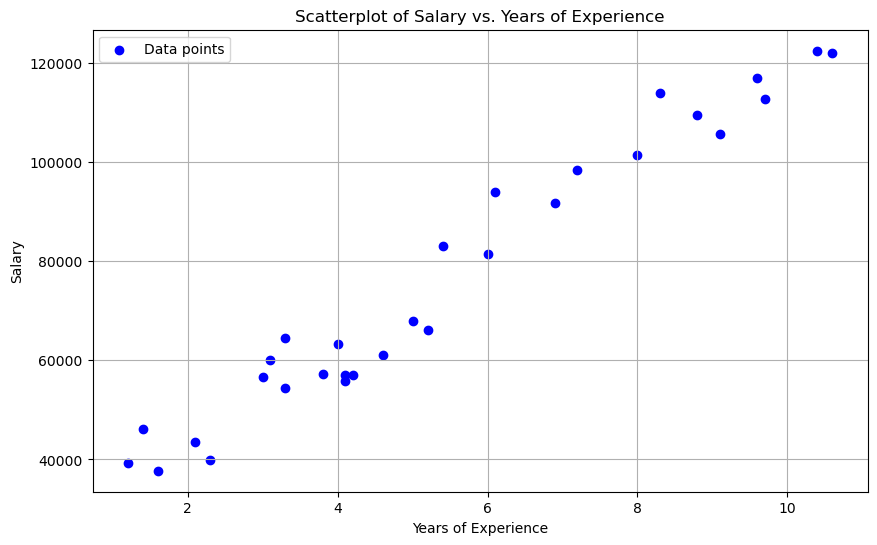

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.14e-20
Time:                        14:21:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     

In [9]:
# Problem 2 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the scatterplots dataset
salary = pd.read_csv('Salary_dataset.csv')

# Problem 2A
#  Plot Salary against YearsExperience as a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(salary['YearsExperience'], salary['Salary'], color='blue', label='Data points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatterplot of Salary vs. Years of Experience')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2C using statsmodels
# Fit the SLR model using LinearRegression
X = salary[['YearsExperience']]  # Predictor variable
y = salary['Salary']  # Response variable

# Add a constant to the predictor variable (intercept term)
betas = sm.add_constant(X)
betas.rename(columns={'const': 'salary_intercept'}, inplace=True)


# Create and fit the model
model = sm.OLS(y, salary_intercept).fit()

# Print the model summary
print(model.summary())

